# Fig S3

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib import rc
from zebrafish_ms2_paper.trace_analysis import extract_traces, remove_blips, predict_protein_v2
import pickle

In [18]:
"""specify the paths to the required datasets"""
path_to_dataset1 = r'/home/brandon/Documents/somitogenesis/paper_1/supplemental_data_files/Supplemental_Data_File_1_Dataset_1_NEW.pkl'#"ADD_PATH_TO_DATASET1_HERE"
path_to_dataset1_manual = r'/media/brandon/Data1/Somitogenesis/Dorado/manual_traces/all_manual_spots_quant.pkl'#"ADD_PATH_TO_DATASET1_MANUAL_HERE"
path_to_non_blank_timepoints = r'/media/brandon/Data1/Somitogenesis/Dorado/non_blank_timepoints_full.pkl'#"ADD_PATH_TO_NON_BLANK_TIMEPOINTS_HERE"
path_to_training_history = r'/media/brandon/Data1/Somitogenesis/Dorado/kfold_models'


In [3]:
"""plot params"""
linewidth = 4
fontweight = 'bold'
fontsize = 24
fontproperties = {'family':'sans-serif','sans-serif':['Arial'],'weight' : fontweight, 'size' : fontsize}
rc('axes', linewidth=4)

## Fig S3C,D
Plot the training history for the spot classifier.

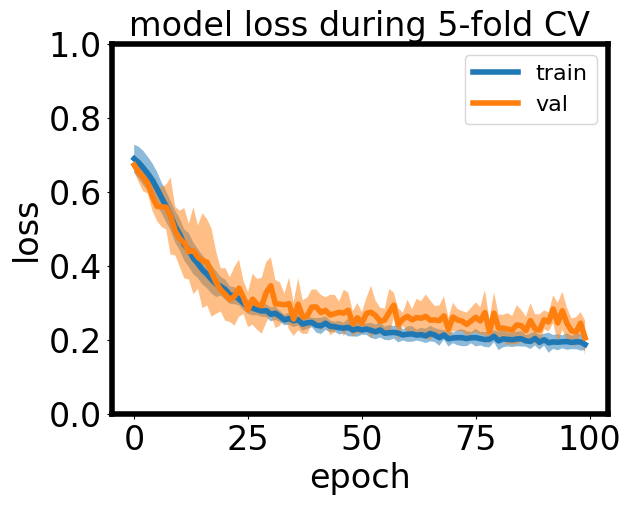

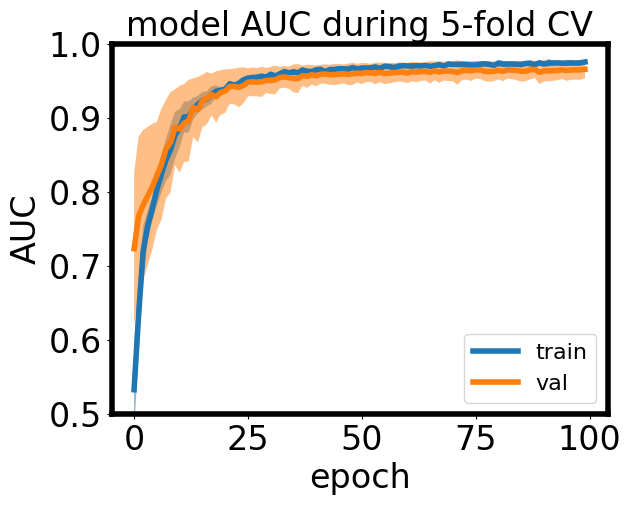

In [17]:
num_histories = 5
epochs = 100
loss_arr = np.zeros((num_histories, epochs))
val_loss_arr = np.zeros((num_histories, epochs))
auc_arr = np.zeros((num_histories, epochs))
val_auc_arr = np.zeros((num_histories, epochs))

for i in range(num_histories):
    history_file = path_to_training_history + '/history_' + str(i+1) + '.pkl'
    with open(history_file, "rb") as fp:
        history = pickle.load(fp)
    loss_arr[i] = history['loss']
    val_loss_arr[i] = history['val_loss']
    auc_arr[i] = history['auc']
    val_auc_arr[i] = history['val_auc']
    
mean_loss = np.mean(loss_arr, axis=0)
std_loss = np.std(loss_arr, axis=0)
mean_val_loss = np.mean(val_loss_arr, axis=0)
std_val_loss = np.std(val_loss_arr, axis=0)

mean_auc = np.mean(auc_arr, axis=0)
std_auc = np.std(auc_arr, axis=0)
mean_val_auc = np.mean(val_auc_arr, axis=0)
std_val_auc = np.std(val_auc_arr, axis=0)

epochs_arr = np.arange(0, 100)

#style
plt.figure()
plt.plot(epochs_arr, mean_loss, label='train', linewidth=4)
plt.fill_between(epochs_arr, mean_loss - std_loss, mean_loss + std_loss, alpha=0.5)
plt.plot(epochs_arr, mean_val_loss, label='val', linewidth=4)
plt.fill_between(epochs_arr, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.5)
plt.xlabel('epoch', fontsize=fontsize)
plt.ylabel('loss', fontsize=fontsize)
plt.ylim([0, 1])
plt.legend(loc='upper right', fontsize=16)
plt.title('model loss during 5-fold CV', fontsize=fontsize)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

plt.figure()
plt.plot(epochs_arr, mean_auc, label='train', linewidth=4)
plt.fill_between(epochs_arr, mean_auc - std_auc, mean_auc + std_auc, alpha=0.5)
plt.plot(epochs_arr, mean_val_auc, label='val', linewidth=4)
plt.fill_between(epochs_arr, mean_val_auc - std_val_auc, mean_val_auc + std_val_auc, alpha=0.5)
plt.xlabel('epoch', fontsize=fontsize)
plt.ylabel('AUC', fontsize=fontsize)
plt.ylim([0.5, 1])
plt.legend(loc='lower right', fontsize=16)
plt.title('model AUC during 5-fold CV', fontsize=fontsize)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

## Fig. S3E
Plot spot intensity vs background

slope = 59.04642792939439 +/- 1.1207577215312212
R^2 = 0.25948737556797846


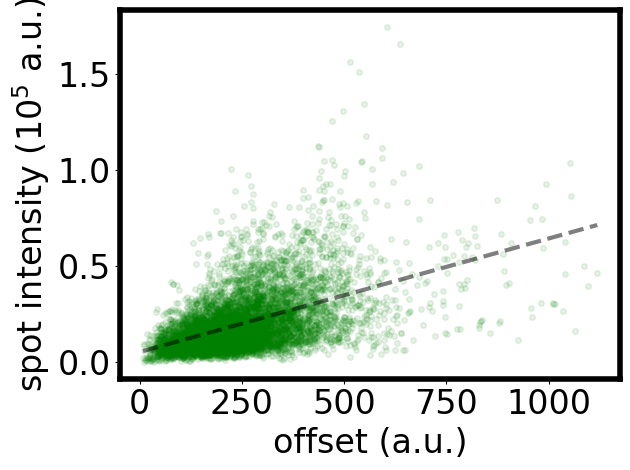

In [27]:
df = pd.read_pickle(path_to_dataset1)
df = df[df.gauss3d_dog > 0]
x = df.offset.values
y = df.gauss3d_dog.values
res = linregress(x, y)
slope = res.slope
intercept = res.intercept

print(f'slope = {slope} +/- {res.stderr}')
print(f'R^2 = {res.rvalue ** 2}')

plt.figure()
plt.plot(df.offset, df.gauss3d_dog / 1e5, 'go', markersize=4, alpha=0.1)
xline = np.linspace(np.min(x), np.max(x), 500)
yline = intercept + slope * xline
plt.plot(xline, yline / 1e5, 'k--', linewidth=3, alpha=0.5)
plt.xlabel('offset (a.u.)', fontsize=fontsize)
plt.ylabel('spot intensity ($10^5$ a.u.)', fontsize=fontsize)
plt.yscale('linear')
plt.xscale('linear')

# style
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

plt.tight_layout()

## Fig S3F
Compare spot background levels ('offset') from two different background estimation methods: traditional Gaussian fitting and our new, more efficient "shell" method (see Methods).



slope = 1.0043685272784597 +/- 0.001452427567824723
R^2 = 0.9837052471541823


<Figure size 640x480 with 0 Axes>

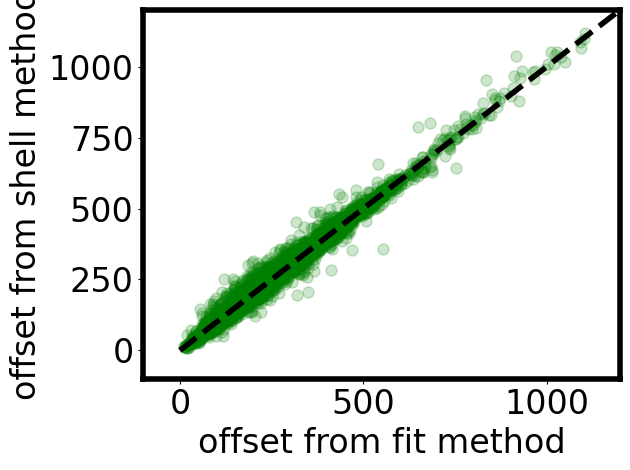

In [26]:
df = pd.read_pickle(path_to_dataset1)


"""now plot scatter plot of the offsets for one vs the other"""
plt.figure()
all_offsets_fit = df.offset_fit.values
all_offsets_shell = df.offset.values

x = np.array(all_offsets_fit)
y = np.array(all_offsets_shell)
plt.figure();
plt.plot(x, y, 'go', markersize=8, alpha=0.2)
res = linregress(x, y)
print(f'slope = {res.slope} +/- {res.stderr}')
print(f'R^2 = {res.rvalue ** 2}')
x = np.linspace(0, 1800, 5)

# 1:1 line
plt.plot(x, x, 'k--', linewidth=4)                
plt.xlabel('offset from fit method', fontsize=24)
plt.ylabel('offset from shell method', fontsize=24)
plt.xlim([-100, 1200])
plt.ylim([-100, 1200])

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

plt.tight_layout()

## Fig S3H
plot one example of manual vs automated traces

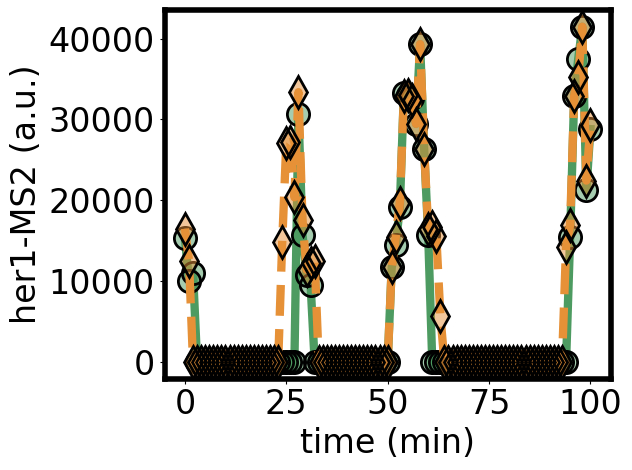

In [8]:
df = pd.read_pickle(path_to_dataset1)
manual_df = pd.read_pickle(path_to_dataset1_manual)
method='gauss3d_dog'

nucleus_ids = [1303]
manual_intens = []
pipeline_intens = []
for nucleus_id in nucleus_ids:
    sub_manual_df = manual_df[manual_df.nucleus_id == nucleus_id]
    sub_df = df[df.nucleus_id == nucleus_id]
    manual_traces = extract_traces(sub_manual_df, method=method)
    traces = extract_traces(sub_df, method=method)
    
    # plot pipeline traces
    plt.figure()
    t_arr, inten_arr, nucleus = traces[0]

    color = np.array([77,155,96]) / 255
    plt.plot(t_arr, inten_arr, '-', linewidth=6, label='pipeline', color=color)
    plt.plot(t_arr, inten_arr, 'o', markersize=16, label='_nolabel_', alpha=0.5, markerfacecolor=color)
    plt.plot(t_arr, inten_arr, 'o', markersize=16, label='_nolabel_', markerfacecolor='none', markeredgecolor='k', markeredgewidth=2)

    t_arr_pipeline = t_arr
    inten_arr_pipeline = inten_arr
    
    # plot manual traces
    t_arr, inten_arr, nucleus = manual_traces[0]
    color = np.array([230,145,56]) / 255
    plt.plot(t_arr, inten_arr, '--', linewidth=6, label='manual', color=color)
    plt.plot(t_arr, inten_arr, 'd', markerfacecolor=color, markeredgecolor='none', markersize=16, label='_nolabel_', alpha=0.5)
    plt.plot(t_arr, inten_arr, 'd', markerfacecolor='none', markeredgecolor='k', markersize=16, label='_nolabel_', markeredgewidth=2)

    t_arr_manual = t_arr
    inten_arr_manual = inten_arr

    plt.xlabel('time (min)', fontsize=24)
    plt.ylabel('her1-MS2 (a.u.)', fontsize=24)
    
    # style
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    plt.tight_layout()


## FigS3I
Compare spot fluorescence intensities from manual and automated traces

false positive rate = 0.038461538461538464
false negative rate = 0.07525083612040134


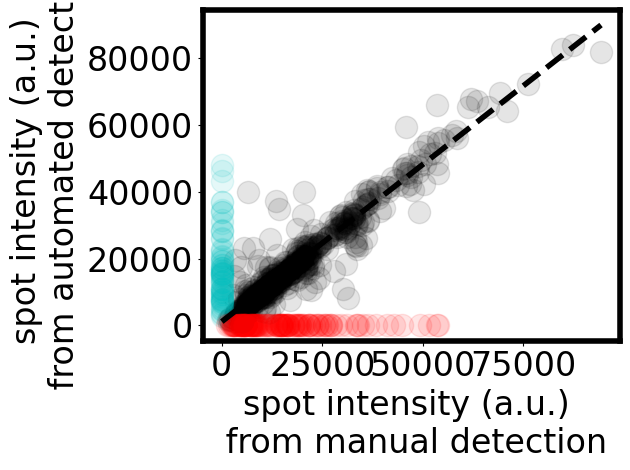

In [28]:
df = pd.read_pickle(path_to_dataset1)
manual_df = pd.read_pickle(path_to_dataset1_manual)
method='gauss3d_dog'

nucleus_ids = manual_df.nucleus_id.unique()
manual_intens = []
pipeline_intens = []
for nucleus_id in nucleus_ids:
    sub_manual_df = manual_df[manual_df.nucleus_id == nucleus_id]
    sub_df = df[df.nucleus_id == nucleus_id]
    manual_traces = extract_traces(sub_manual_df, method=method)
    traces = extract_traces(sub_df, method=method)
    
    # plot pipeline traces
    t_arr, inten_arr, nucleus = traces[0]
    t_arr_pipeline = t_arr
    inten_arr_pipeline = inten_arr
    
    # plot manual traces
    t_arr, inten_arr, nucleus = manual_traces[0]
    t_arr_manual = t_arr
    inten_arr_manual = inten_arr
    
    # create "full" arrays that have the same len for pipeline and manual
    all_ts = np.concatenate((t_arr_pipeline, t_arr_manual))
    full_t_arr = np.arange(np.min(all_ts), np.max(all_ts) + 1)
    
    full_inten_arr_pipeline = np.zeros_like(full_t_arr)
    full_inten_arr_manual = np.zeros_like(full_t_arr)
    
    # pipeline
    start_time = np.where(t_arr_pipeline[0] == full_t_arr)[0][0]
    end_time = np.where(t_arr_pipeline[-1] == full_t_arr)[0][0]
    full_inten_arr_pipeline[start_time:end_time+1] = inten_arr_pipeline
    
    # manual
    start_time = np.where(t_arr_manual[0] == full_t_arr)[0][0]
    end_time = np.where(t_arr_manual[-1] == full_t_arr)[0][0]
    full_inten_arr_manual[start_time:end_time+1] = inten_arr_manual
    
    pipeline_intens.extend(full_inten_arr_pipeline)
    manual_intens.extend(full_inten_arr_manual)
    
    
"""
assemble arrays with intens for manual and pipeline at each time point and plot against each other
"""
# compute false positive and false negatives
has_spot_manual = np.array(manual_intens) > 0
has_spot_pipeline = np.array(pipeline_intens) > 0

# fit 1-1 line
good_ids = has_spot_manual * has_spot_pipeline 
x = np.array(manual_intens)[good_ids]
y = np.array(pipeline_intens)[good_ids]
res = linregress(x, y)
slope = res.slope
intercept = res.intercept
rsq = res.rvalue ** 2
slope_uncertainty = res.stderr

xline = np.arange(np.min(manual_intens), np.max(manual_intens))


plt.figure()

# both spots
good_ids = has_spot_manual * has_spot_pipeline 
plt.plot(np.array(manual_intens)[good_ids], np.array(pipeline_intens)[good_ids], 'ko', markersize=16, alpha=0.1)
plt.xlabel('spot intensity (a.u.) \n from manual detection', fontsize=24)
plt.ylabel('spot intensity (a.u.) \n from automated detection', fontsize=24)

# false positives
good_ids = (has_spot_pipeline) *  (~has_spot_manual)
plt.plot(np.array(manual_intens)[good_ids], np.array(pipeline_intens)[good_ids], 'co', markersize=16, alpha=0.1)
plt.xlabel('spot intensity (a.u.) \n from manual detection', fontsize=24)
plt.ylabel('spot intensity (a.u.) \n from automated detection', fontsize=24)

# false negatives
good_ids = (~has_spot_pipeline) *  (has_spot_manual)
plt.plot(np.array(manual_intens)[good_ids], np.array(pipeline_intens)[good_ids], 'ro', markersize=16, alpha=0.1)
plt.xlabel('spot intensity (a.u.) \n from manual detection', fontsize=24)
plt.ylabel('spot intensity (a.u.) \n from automated detection', fontsize=24)

false_positive = np.sum((has_spot_pipeline) *  (~has_spot_manual)) / len(has_spot_pipeline)
false_negative = np.sum((has_spot_manual) * (~has_spot_pipeline)) / len(has_spot_pipeline)

print(f'false positive rate = {false_positive}')
print(f'false negative rate = {false_negative}')


yline = slope * xline + intercept
plt.plot(xline, yline, '--', linewidth=4, color='k')


# style
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

plt.tight_layout()